## Random Character Trait Assignment

## Table of Contents:
* [Imports and Functions](#zero-bullet)
* [Population Percentages](#first-bullet)
    * [Sexual Orientation](#second-bullet)
    * [Age](#third-bullet)
    * [Visual impairment](#fourth-bullet)
    * [Handedness](#fifth-bullet)
    * [Max Height](#sixth-bullet)

In [1]:
# Table of contents not currently working in VScode

### Imports and Functions <a class="anchor" id="zero-bullet"></a>

In [2]:
#import libraries 
import matplotlib.pyplot as plt
import pandas as pd
import random

filename ="CharacterNamesV3.csv"
names_df = pd.read_csv(filename, sep=",")
names_df["sexual_orientation"] = ""
names_df["age"] = 0
names_df["visual_impairment"] = ""
names_df["handedness"] = ""
names_df["heightCM"] = 0

#print(names_df.shape)
#names_df.head()

def removeElementsFromList(takeOutList, mainList) -> list:
    a = mainList

    # Elements to remove
    remove = takeOutList

    # Remove elements using list comprehension
    a = [x for x in a if x not in remove]

    return a

def selectnFromList (n, listLen, ppl_list = []):
    # determine which list to sample from
    if ppl_list == []:
        # list of items
        tList = list(range(listLen))
    else:
        tList = ppl_list
    
    # using the sample() method
    UpdatedList = random.sample(tList, n)

    # sort list
    UpdatedList.sort()
    orderedList = UpdatedList

    # remove sampled items from main list
    if ppl_list != []:
        ppl_list = removeElementsFromList(takeOutList=orderedList, mainList=ppl_list)
    else:
        ppl_list = removeElementsFromList(takeOutList=orderedList, mainList=tList)

    # return random selections from the list without repetition
    # and the main list 
    return (UpdatedList, ppl_list)

def selectnFromList_age (n, listLen, ppl_list = []):
    
    # using the sample() method
    UpdatedList = random.sample(ppl_list, n)

    # sort list
    UpdatedList.sort()
    orderedList = UpdatedList

    Updated_ppl_list = removeElementsFromList(takeOutList=orderedList, mainList=ppl_list)

    # return random selections from the list without repetition
    # and the main list 
    return (UpdatedList, Updated_ppl_list)

def setGeneralTrait (percentage, trait, df, ppl_list, column_num):

    number_of_ppl = df.shape[0] # number of people one less than it should be for zero index reasons

    n_people_w_trait = int(round((number_of_ppl+1) * percentage,0))

    (index_ppl_w_trait, ppl_list) = selectnFromList(n= n_people_w_trait, listLen=number_of_ppl, ppl_list=ppl_list)

    df.iloc[index_ppl_w_trait, column_num] = trait 
    
    return (df, ppl_list)


### Population Percentages <a class="anchor" id="first-bullet"></a>

#### Sexual Orientation <a class="anchor" id="second-bullet"></a>
https://www.ipsos.com/sites/default/files/ct/news/documents/2021-06/LGBT%20Pride%202021%20Global%20Survey%20Report_3.pdf	
- Gay = 2%
- Lesbian = 2%
- Bisexual = 8%
- Pansexual/Omnisexual = 1.5%
- Asexual = 1.5%
- Other = 1%
- Don't know/won't say = 13%
- Heterosexual = 71%

In [3]:
gay_p = 0.02
lesbian_p = 0.02
gay_lesbian_p = 0.04
bisexual_p = 0.08
pansexual_p = 0.015
asexual_p = 0.015
other_p= 0.01
idk_p = 0.13
heterosexual = 0.71
orientation_column_num = names_df.columns.get_loc("sexual_orientation")

(names_df, ppl_list) =  setGeneralTrait(gay_lesbian_p,"Gay/Lesbian", df=names_df, ppl_list=[], column_num=orientation_column_num)
(names_df, ppl_list) =  setGeneralTrait(bisexual_p,"Bisexual", df=names_df, ppl_list=ppl_list, column_num=orientation_column_num)
(names_df, ppl_list) =  setGeneralTrait(pansexual_p,"Pansexual", df=names_df, ppl_list=ppl_list, column_num=orientation_column_num)
(names_df, ppl_list) =  setGeneralTrait(asexual_p,"Asexual", df=names_df, ppl_list=ppl_list, column_num=orientation_column_num)
(names_df, ppl_list) =  setGeneralTrait(other_p,"Other", df=names_df, ppl_list=ppl_list, column_num=orientation_column_num)
(names_df, ppl_list) =  setGeneralTrait(idk_p,"idk", df=names_df, ppl_list=ppl_list, column_num=orientation_column_num)


#### Age <a class="anchor" id="third-bullet"></a>

In [4]:
#create age dataframe
age_df = pd.DataFrame({'age':     ['0-9', '10-19','20-29','30-39', '40-49','50-59','60-69',  '70-79','80-89','90-99', "100-110"], 
                    'men_p':   [0.16,  0.158,   0.149,   0.138,    0.127,  0.107,  0.088,     0.054,    0.0139,  0.005,   0.0001], 
                    'women_p': [0.143,  0.141,   0.137,  0.133,     0.125,   0.114,  0.10,     0.065,   0.025,  0.012,   0.005]})
#check to see if percentages sum to 1 
#print(age_df["men_p"].sum())
#print(age_df["women_p"].sum())

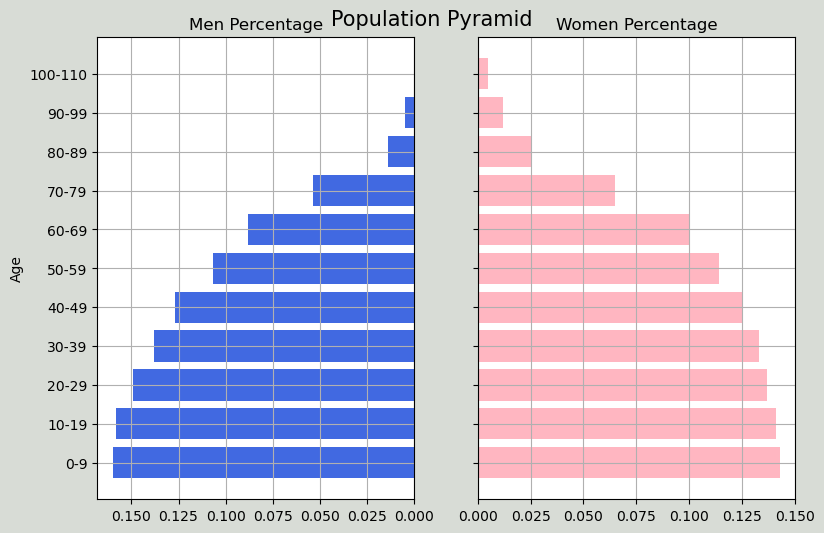

In [5]:
#define x and y limits
y = range(0, len(age_df))
x_men = age_df['men_p']
x_women = age_df['women_p']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define men and women bars
axes[0].barh(y, x_men, align='center', color='royalblue')
axes[0].set(title='Men Percentage')
axes[1].barh(y, x_women, align='center', color='lightpink')
axes[1].set(title='Women Percentage')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=age_df['age'])
axes[0].set_ylabel('Age')
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

In [6]:
def makeAge(age_i):
    start = 0+(10*age_i)
    stop = 9+(10*age_i)
    if age_i < 8:
        return random.randrange(start, stop)
    else:
        rnd_val = random.betavariate(alpha=1,beta=3)
        return int((rnd_val + age_i)*10)

def setAge (percentage, age_i, df, ppl_list, group_size, column_num):

    number_of_ppl = group_size 

    n_people_w_age = int(round((number_of_ppl) * percentage,0))

    (index_ppl_w_age, ppl_list) = selectnFromList_age(n= n_people_w_age, listLen=number_of_ppl, ppl_list=ppl_list)

    for person_ in index_ppl_w_age:
        age_ = makeAge(age_i)
        df.iloc[person_,column_num] = age_ 
    
    return (df, ppl_list)

In [7]:
ppl_w_list = names_df.index[names_df['genderF'] == 1].tolist()
ppl_m_list = names_df.index[names_df['genderM'] == 1].tolist()
group_size_w = len(ppl_w_list)
group_size_m = len(ppl_m_list)
age_column_num = names_df.columns.get_loc("age")

n_age_brackets = age_df.shape[0]
for i_ in range(n_age_brackets):
    [age, m_p, w_p]= list(age_df.iloc[i_,:])

    (names_df, ppl_w_list) =  setAge(w_p, age_i=i_, df=names_df, ppl_list=ppl_w_list, group_size=group_size_w, column_num=age_column_num)
    (names_df, ppl_m_list) =  setAge(m_p, age_i=i_, df=names_df, ppl_list=ppl_m_list, group_size=group_size_m, column_num=age_column_num)


#### Visual impairment <a class="anchor" id="fourth-bullet"></a>

https://www.nih.gov/news-events/news-releases/study-finds-most-americans-have-good-vision-14-million-are-visually-impaired	

- 6% of us population is visually impared and of this 83% can be corrected with glasses/contacts.
- 5% of us population could use glasses.
- 1% has vision impairment that glasses don't help.

In [8]:
lenses_p = 0.05
otherVisualimpairment_p = 0.01
vision_column_num = names_df.columns.get_loc("visual_impairment")

(names_df, ppl_list) =  setGeneralTrait(lenses_p,"Glasses/Contacts", df=names_df, ppl_list=[], column_num=vision_column_num)
(names_df, ppl_list) =  setGeneralTrait(otherVisualimpairment_p,"Other visual impairment", df=names_df, ppl_list=ppl_list, column_num=vision_column_num)


#### Handedness <a class="anchor" id="fifth-bullet"></a>
https://osf.io/preprints/psyarxiv/5gjac	

- ~11% population left handed	

In [9]:
left_handed_p = 0.11
handedness_column_num = names_df.columns.get_loc("handedness")
(names_df, ppl_list) =  setGeneralTrait(left_handed_p,"Left handed", df=names_df, ppl_list=[], column_num=handedness_column_num)


#### Max Height <a class="anchor" id="sixth-bullet"></a>
- https://tall.life/height-percentile-calculator-age-country/	
- https://en.wikipedia.org/wiki/Average_human_height_by_country	

In [10]:
n_rows = names_df.shape[0]

for row_ in range(n_rows):
    avg_height = float(names_df.loc[row_,"averageHeightForCountryMetricCM"])
    std_height = float(names_df.loc[row_,"STDHeightForCountryMetricCM"])

    rnd_normal_height = int(round(random.gauss(mu=avg_height, sigma=std_height),0))

    names_df.loc[row_,"heightCM"] = rnd_normal_height

In [11]:
names_df.to_csv('Characters with Traits.csv', index=False)  